In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Loading the dataset

In [ ]:
data = pd.read_csv('mushrooms-full-dataset.csv')

In [ ]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.shape

(8124, 22)

In [ ]:
data['poisonous'].value_counts()

,count
poisonous,
e,4208
p,3916


In [ ]:
data.isnull().sum()

,0
poisonous,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


# Preprocessing

In [ ]:
target = data['poisonous']
inputs = data.drop(columns=['poisonous'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=2,
                                                    stratify = target)

In [ ]:
y_train.value_counts()

,count
poisonous,
e,3366
p,3133


In [ ]:
y_test.value_counts()

,count
poisonous,
e,842
p,783


# Encoding

In [ ]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

In [ ]:
X_train_encoded = enc_i.fit_transform(X_train)
X_test_encoded = enc_i.transform(X_test)

y_train_encoded = enc_t.fit_transform(y_train)
y_test_encoded = enc_t.transform(y_test)

# Rescaling

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Classification

In [ ]:
C = 1.0

In [ ]:
svc = svm.SVC(kernel = 'linear', C=C)

In [ ]:
svc.fit(X_train_scaled, y_train_encoded)

SVC(kernel='linear')

In [ ]:
y_pred_test = svc.predict(scaler.transform(X_test_encoded))

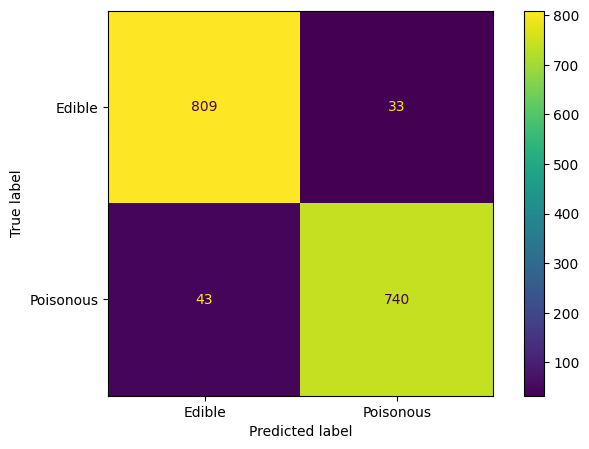

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_encoded, y_pred_test),
    display_labels = ['Edible', 'Poisonous'],
)

cmp.plot(ax=ax)

In [ ]:
print(classification_report(y_test_encoded, y_pred_test, target_names = ['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.95      0.96      0.96       842
   Poisonous       0.96      0.95      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



# Hyperparamter tuning

In [ ]:
tuned_parameters = [
    {'kernel': ['linear'], 'C':[1, 10]},
    {'kernel': ['poly'], 'C':[1,10]},
    {'kernel': ['rbf'], 'gamma':[1e-3, 1e-4], 'C':[1,10]}
]

In [ ]:
scores = ['precision', 'recall']

In [ ]:
for score in scores:
  print("Tuning hyperparameters for %s" % score)
  print()

  clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='%s_macro' % score)
  clf.fit(X_train_scaled, y_train_encoded)

  print("Best parameters set found development set:")
  print()
  print(clf.best_params_)
  print()
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.3f) for %r " % (mean, std*2, params))

  print()
  print("Detailed classification report:")
  print()
  print("The model is trained on the full development set.")
  print("The scores are computed on the full evalation set.")
  print()

  y_true, y_pred = y_test_encoded, clf.predict(scaler.transform(X_test_encoded))
  print(classification_report(y_true, y_pred))
  print()

Tuning hyperparameters for precision



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Best parameters set found development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.951 (+/-0.008) for {'C': 1, 'kernel': 'linear'} 
0.956 (+/-0.008) for {'C': 10, 'kernel': 'linear'} 
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'} 
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'} 
0.917 (+/-0.019) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 
0.259 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'} 
0.938 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 
0.917 (+/-0.019) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'} 

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evalation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00  